In [36]:
import random

import networkx as nx
import matplotlib.pyplot as plt

from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *

In [37]:
car_types = ['Седан', 'Хэтчбек', 'Внедорожник',
                'Минивэн', 'Спортивный автомобиль']
brands_and_models = [('Toyota', 'Corolla'), ('Toyota', 'Camry'), ('Toyota', 'Rav4'), ('BMW', '3 Series'),
                     ('BMW', '5 Series'), ('BMW', 'X3'), ('Audi', 'A4'), ('Audi', 'A6'), ('Audi', 'Q5'),
                     ('Mercedes-Benz', 'C-Class'), ('Mercedes-Benz', 'E-Class'), ('Mercedes-Benz', 'GLC'),
                     ('Volkswagen', 'Golf'), ('Volkswagen', 'Passat'), ('Volkswagen', 'Tiguan'), ('Honda', 'Civic'),
                     ('Honda', 'Accord'), ('Honda', 'CR-V'), ('Nissan', 'Altima'), ('Nissan', 'Maxima'),
                     ('Nissan', 'Rogue'), ('Ford', 'Fusion'), ('Ford', 'Mustang'), ('Ford', 'Explorer'),
                     ('Chevrolet', 'Malibu'), ('Chevrolet', 'Camaro'), ('Chevrolet', 'Equinox'),
                     ('Hyundai', 'Elantra'), ('Hyundai', 'Sonata'), ('Hyundai', 'Tucson'), ('Kia', 'Forte'),
                     ('Kia', 'Optima'), ('Kia', 'Sportage'), ('Subaru', 'Impreza'), ('Subaru', 'Legacy'),
                     ('Subaru', 'Forester'), ('Mazda', '3'), ('Mazda', '6'), ('Mazda', 'CX-5'), ('Jeep', 'Cherokee'),
                     ('Jeep', 'Grand Cherokee')]
years = list(range(2000, 2024))
mileages = list(range(0, 200000, 500))
rental_costs = list(range(2000, 100000, 500))
fuel_economy_oil = list(range(4, 20))
fuel_econimy_electro = list(range(100, 500))
fuel_types = ['Бензин', 'Дизель', 'Электро']
colors = ['Черный', 'Белый', 'Красный']
transmissions = ['Ручная', 'Автомат']
additional_options = ["Обогрев сидений", "Круиз-контроль", "Кондиционер", "Парковочные датчики", "Камера заднего вида", "Система стабилизации", "Система помощи при старте в гору", "Система контроля давления в шинах", "Система контроля мертвых зон", "Система автоматического торможения", "Система распознавания дорожных знаков", "Навигационая система", "Кожаный салон"]
    
def generateCars(n):
    cars = []
    for _ in range(n):
        brand, model = random.choice(brands_and_models)
        fuel_type = random.choice(fuel_types)
        if fuel_type == 'Электро':
            fuel_economy = random.choice(fuel_econimy_electro)
        else:
            fuel_economy = random.choice(fuel_economy_oil)
        car = {
            'Тип автомобиля': random.choice(car_types),
            'Бренд и модель': f"{brand} {model}",
            'Год выпуска': random.choice(years),
            'Пробег': random.choice(mileages),
            'Стоимость аренды': random.choice(rental_costs),
            'Трансмисия': random.choice(transmissions),
            'Цвет': random.choice(colors),
            'Расход топлива': fuel_economy,
            'Тип топлива': fuel_type,
            'Дополнительные опции': ', '.join(random.sample(additional_options, random.randint(0, len(additional_options))))
        }
        cars.append(car)
    return cars



def filterCars(options: list, seed = 45):
    random.seed(seed)
    cars = generateCars(1000)
    for option in options:
        if option[0] == 'Стоимость аренды': 
            cars = [car for car in cars if car[option[0]] > (option[1])[0] and car[option[0]] <= (option[1])[1]]
            continue
        if option[0] == 'Бренд и модель':
            cars = [car for car in cars if option[1] in car[option[0]]]
            continue
        if option[0] == 'Дополнительные опции':
            for item in option[1]:
                cars = [car for car in cars if item in car[option[0]]]
            continue
        cars = [car for car in cars if car[option[0]] == option[1]]
    return cars

In [38]:
questions = {
    0: {
        "question": "Какой бюджет вы планируете на аренду автомобиля?",
        "answers": {
            "Меньше 5000 рублей": 1,
            "От 5000 до 20000 рублей": 1,
            "Больше 20000 рублей": 1
        },
        "description": "Этот вопрос помогает экспертной системе определить финансовые предпочтения клиента и предложить варианты аренды, соответствующие его бюджету. Выбор бюджета влияет на класс автомобиля, его оснащение и возможные дополнительные услуги.",
        "answerDescription": {
            "Меньше 5000 рублей": "Вы ищете наиболее экономичный вариант аренды, который подойдет для коротких поездок или если вам необходим базовый транспорт без дополнительных удобств.",
            "От 5000 до 20000 рублей": "Этот диапазон бюджета предполагает, что вы готовы потратить среднюю сумму за комфорт и функциональность, которые могут включать дополнительные опции, такие как автомобиль бизнес-класса или дополнительное страхование.",
            "Больше 20000 рублей": "Выбор бюджета свыше 20000 рублей указывает на желание арендовать автомобиль премиум-класса с высоким уровнем комфорта и рядом эксклюзивных услуг. Это может включать в себя аренду люксовых автомобилей, спортивных моделей или включение полного пакета страхования."
        }
    },
    1: {
        "question": "Какой тип автомобиля вы предпочитаете?",
        "answers": {
            "Седан": 5,
            "Внедорожник": 5,
            "Минивэн": 5,
            "Хэтчбек": 5,
            "Купе": 5
        },
        "description": "Этот вопрос поможет экспертной системе понять предпочтения клиента в стиле и функциональности автомобиля, что важно для обеспечения максимального удовлетворения от аренды.",
        "answerDescription": {
            "Седан": "Идеальный выбор для тех, кто ценит классический стиль и комфорт. Седаны подходят для городских поездок и длительных расстояний, обеспечивая хорошую управляемость и просторный салон.",
            "Внедорожник": "Если вам нужен автомобиль с высокой проходимостью и вместительным салоном, внедорожник будет отличным выбором. Он подходит для путешествий по бездорожью и перевозки большого количества багажа.",
            "Минивэн": "Минивэн - это идеальный вариант для больших семей или групп, которым нужно много места для пассажиров и багажа. Они также подходят для длительных поездок с комфортом.",
            "Хэтчбек": "Хэтчбеки - это компактные и экономичные автомобили, которые идеально подходят для городской езды и легкой парковки. Они предлагают гибкость в использовании пространства благодаря складывающимся задним сиденьям.",
            "Купе": "Для любителей скорости и динамики спортивный автомобиль будет предпочтительным выбором. Они предлагают высокую производительность и захватывающие ощущения от вождения."
        } 
    },
    2: {
        "question": "Нужен ли вам автомобиль с автоматической коробкой передач?",
        "answers": {
            "Да": 6,
            "Нет": 100
        },
        "description": "Этот вопрос поможет экспертной системе узнать предпочтения клиента относительно управления автомобилем. Автоматическая коробка передач обеспечивает более легкое и комфортное вождение, особенно в условиях городского трафика.",
        "answerDescription": {
            "Да": "Вы предпочитаете автомобиль с автоматической коробкой передач для удобства вождения, особенно если вы не привыкли к механической коробке или планируете часто ездить в условиях плотного трафика.",
            "Нет": "Вы комфортно чувствуете себя за рулем автомобиля с механической коробкой передач или ищете более экономичный вариант аренды, так как автомобили с механической коробкой передач часто бывают дешевле в аренде."
        }
    },
    3: {
        "question": "Какой цвет автомобиля вы предпочитаете?",
        "answers": {
            "Черный": 9,
            "Белый": 10,
            "Красный": 101
        },
        "description": "Выбор цвета автомобиля может быть важным аспектом для многих клиентов, так как цвет может отражать личные предпочтения или желаемый образ.",
        "answerDescription": {
            "Черный": "Черный цвет часто ассоциируется с элегантностью и роскошью. Это традиционный выбор для деловых поездок и тех, кто предпочитает классический стиль.",
            "Белый": "Белый цвет символизирует чистоту и простоту. Это популярный выбор для свадебных мероприятий или для тех, кто ищет светлый и привлекательный автомобиль.",
            "Красный": "Красный цвет выбирают любители яркости и динамики. Это цвет для тех, кто хочет выделиться и подчеркнуть свою индивидуальность. Красный автомобиль привлекает внимание и может быть идеальным для особых случаев."
        }
        },
    4: {
        "question": "Нужен ли вам автомобиль с кондиционером?",
        "answers": {
            "Да": 11,
            "Нет": 102
        },
        "description": "Этот вопрос помогает определить, насколько важен для клиента комфорт во время поездки, особенно в жаркую погоду или в регионах с высокими температурами.",
        "answerDescription": {
            "Да": "Выбор этого варианта означает, что для вас важен комфорт во время вождения, особенно если вы планируете путешествовать в жаркое время года или в регионы с высокими температурами. Кондиционер обеспечит приятный микроклимат в салоне автомобиля.",
            "Нет": "Если вы выбираете этот вариант, значит, наличие кондиционера для вас не является приоритетом. Это может быть связано с предпочтением езды с открытыми окнами или если вы планируете арендовать автомобиль в местности с умеренным климатом."
        }
    },
    5: {
        "question": "Какой бренд автомобиля вы предпочитаете?",
        "answers": {
            "Toyota": 12,
            "BMW": 2,
            "Mercedes-Benz": 2,
            "Audi": 3,
            "Volkswagen": 2,
            "Honda": 3,
            "Nissan": 4,
            "Ford": 4,
            "Chevrolet": 2,
            "Hyundai": 2,
            "Kia": 4,
            "Subaru": 3,
            "Mazda": 2,
            "Jeep": 4
        },
        "description": "Выбор бренда автомобиля может быть основан на личных предпочтениях, опыте или восприятии качества и статуса. Этот вопрос помогает экспертной системе подобрать автомобиль, который соответствует ожиданиям клиента и его представлениям о комфорте и стиле.",
        "answerDescription": {
            "Toyota": "Выбор Toyota может отражать предпочтение надежности и эффективности. Toyota известна своими долговечными и экономичными моделями.",
            "BMW": "Предпочтение BMW указывает на стремление к динамике вождения и спортивному стилю. BMW славится своими мощными двигателями и высоким уровнем комфорта.",
            "Mercedes-Benz": "Выбор Mercedes-Benz часто связан с желанием роскоши и высокого статуса. Этот бренд предлагает высококачественные интерьеры и передовые технологии.",
            "Audi": "Audi выбирают за современный дизайн и инновационные технологии. Этот бренд известен своими стильными и мощными автомобилями.",
            "Volkswagen": "Volkswagen может быть выбран за его надежность и практичность. Это бренд с широким ассортиментом моделей, подходящих для разных нужд.",
            "Honda": "Honda известна своими эффективными и надежными автомобилями, которые подходят для ежедневного использования.",
            "Nissan": "Nissan предлагает широкий выбор автомобилей, от экономичных до спортивных моделей, и известен своими инновациями.",
            "Ford": "Ford - это бренд с богатой историей, предлагающий надежные автомобили для широкого круга потребителей.",
            "Chevrolet": "Chevrolet - это американский бренд, который предлагает прочные и мощные автомобили.",
            "Hyundai": "Hyundai выбирают за сочетание доступности, стиля и надежности. Этот бренд предлагает современные и комфортабельные автомобили.",
            "Kia": "Kia привлекает клиентов своим дизайном, доступностью и длительной гарантией на свои автомобили.",
            "Subaru": "Subaru известен своими автомобилями с полным приводом и высоким уровнем безопасности.",
            "Mazda": "Mazda предпочитают за уникальный дизайн и впечатляющие характеристики вождения.",
            "Jeep": "Jeep - это выбор для тех, кто ищет приключений и хочет автомобиль с высокой проходимостью для бездорожья."
        }
    },
    6: {
        "question": "Нужен ли вам автомобиль с навигационной системой?",
        "answers": {
            "Да": 103,
            "Нет": 7
        },
        "description": "Этот вопрос поможет экспертной системе определить, насколько важна для клиента возможность легко ориентироваться во время поездки, особенно если он планирует поездки в незнакомые места.",
        "answerDescription": {
            "Да": "Выбор этого варианта говорит о том, что вам важно иметь под рукой современные средства навигации для удобства планирования маршрута и избежания заторов. Навигационная система особенно полезна в незнакомых городах или при длительных путешествиях.",
            "Нет": "Если вы выбираете этот вариант, значит, вы уверены в своих навигационных способностях или планируете использовать альтернативные методы, такие как смартфон или карты. Это также может быть выбором для тех, кто хочет сэкономить на стоимости аренды."
        }
    },
    7: {
        "question": "Нужен ли вам автомобиль с кожаным салоном?",
        "answers": {
            "Да": 8,
            "Нет": 104
        },
        "description": "Этот вопрос позволяет экспертной системе узнать, предпочитает ли клиент более роскошный и стильный интерьер автомобиля. Кожаный салон часто ассоциируется с высоким уровнем комфорта и элегантностью.",
        "answerDescription": {
            "Да": "Выбор этого варианта говорит о том, что вы цените роскошь и комфорт во время поездки. Кожаный салон не только придает автомобилю более престижный вид, но и обеспечивает легкость ухода и долговечность.",
            "Нет": "Если вы выбираете этот вариант, значит, для вас не столь важен тип отделки салона, и вы можете предпочесть более практичные или экономичные варианты. Это также может быть выбором для тех, кто ищет аренду автомобиля на более короткий срок или для менее формальных случаев."
        }
    },
    8: {
        "question": "Нужен ли вам автомобиль с обогревом сидений?",
        "answers": {
            "Да": 105,
            "Нет": 106
        },
        "description": "Этот вопрос поможет экспертной системе определить, насколько важен для клиента дополнительный комфорт в холодное время года или в регионах с прохладным климатом.",
        "answerDescription": {
            "Да": "Выбор этого варианта указывает на то, что вы цените дополнительный комфорт во время поездки, особенно в холодную погоду. Обогрев сидений обеспечивает тепло и уют, делая вождение более приятным в зимние месяцы.",
            "Нет": "Если вы выбираете этот вариант, значит, для вас не критично наличие обогрева сидений в автомобиле. Это может быть связано с предпочтением более теплого климата или желанием сэкономить на стоимости аренды."
        }
    },
    9: {
        "question": "Нужен ли вам автомобиль с круиз-контролем?",
        "answers": {
            "Да": 107,
            "Нет": 10
        },
        "description": "Этот вопрос поможет экспертной системе определить, насколько важна для клиента функция поддержания постоянной скорости автомобиля без необходимости постоянно держать ногу на педали газа, что особенно удобно при длительных поездках по автомагистралям.",
        "answerDescription": {
            "Да": "Выбор этого варианта говорит о том, что вы цените удобство и комфорт во время длительных поездок. Круиз-контроль позволяет водителю отдохнуть и снизить усталость, поддерживая постоянную скорость без необходимости активного участия.",
            "Нет": "Если вы выбираете этот вариант, значит, функция круиз-контроля для вас не является приоритетной. Это может быть связано с предпочтением активного управления автомобилем или если вы планируете использовать автомобиль в основном для коротких поездок по городу, где эта функция не так важна."
        }
    },
    10: {
        "question": "Нужен ли вам автомобиль с системой стабилизации?",
        "answers": {
            "Да": 108,
            "Нет": 109
        },
        "description": "Этот вопрос позволяет экспертной системе определить, насколько важна для клиента безопасность вождения. Система стабилизации помогает контролировать автомобиль в сложных дорожных условиях и при резких маневрах.",
        "answerDescription": {
            "Да": "Выбор этого варианта указывает на то, что вы цените безопасность и хотите иметь дополнительные средства контроля за автомобилем. Система стабилизации может быть особенно важна при вождении в плохую погоду или на скользких дорогах.",
            "Нет": "Если вы выбираете этот вариант, значит, для вас не критично наличие системы стабилизации. Возможно, вы уверены в своих навыках вождения или планируете использовать автомобиль в условиях, где риск потери управления минимален."
        }
    },
    11: {
        "question": "Нужен ли вам автомобиль с системой помощи при старте в гору?",
        "answers": {
            "Да": 12,
            "Нет": 110
        },
        "description": "Этот вопрос позволяет экспертной системе определить, насколько важна для клиента поддержка при вождении в условиях горной местности. Система помощи при старте в гору предотвращает откат автомобиля на склоне и облегчает начало движения вверх.",
        "answerDescription": {
            "Да": "Выбор этого варианта говорит о том, что вы цените дополнительные функции безопасности и удобства при вождении в горной местности. Система помощи при старте в гору особенно полезна, если вы планируете поездки по холмистым или горным дорогам.",
            "Нет": "Если вы выбираете этот вариант, значит, для вас не критично наличие данной системы. Возможно, вы не планируете вождение в условиях, где она может быть необходима, или уверены в своих навыках управления автомобилем на подъемах."
        }
    },
    12: {
        "question": "Нужен ли вам автомобиль с системой контроля давления в шинах?",
        "answers": {
            "Да": 111,
            "Нет": 13
        },
        "description": "Этот вопрос помогает экспертной системе определить, насколько важен для клиента контроль за состоянием шин во время поездки. Система контроля давления в шинах предупреждает о потенциальных проблемах, что повышает безопасность и эффективность вождения.",
        "answerDescription": {
            "Да": "Выбор этого варианта показывает, что вы хотите быть уверены в безопасности и надежности автомобиля. Система контроля давления в шинах обеспечивает своевременное оповещение о необходимости подкачки шин, что может предотвратить аварийные ситуации и уменьшить износ шин.",
            "Нет": "Если вы выбираете этот вариант, значит, вы предпочитаете самостоятельно следить за состоянием шин или считаете, что данная система не является необходимой для ваших поездок. Это может быть связано с короткими поездками или вождением в условиях, где риск потери давления в шинах минимален."
        }
    },
    13: {
        "question": "Нужен ли вам автомобиль с системой контроля мертвых зон?",
        "answers": {
            "Да": 112,
            "Нет": 14
        },
        "description": "Этот вопрос помогает экспертной системе определить, насколько важна для клиента безопасность при смене полосы движения. Система контроля мертвых зон предупреждает водителя о транспортных средствах, находящихся в слепых зонах, что может быть критично на загруженных дорогах.",
        "answerDescription": {
            "Да": "Выбор этого варианта указывает на то, что вы цените дополнительные функции безопасности, которые могут предотвратить столкновения при смене полосы движения. Система контроля мертвых зон особенно полезна в густом городском трафике и на скоростных шоссе.",
            "Нет": "Если вы выбираете этот вариант, значит, вы уверены в своих навыках вождения и способности контролировать окружающее пространство без дополнительных систем. Это также может быть выбором для тех, кто хочет сэкономить на стоимости аренды автомобиля."
        }
    },
    14: {
        "question": "Нужен ли вам автомобиль с системой автоматического торможения?",
        "answers": {
            "Да": 113,
            "Нет": 114
        },
        "description": "Этот вопрос помогает экспертной системе определить, насколько важна для клиента дополнительная безопасность во время вождения. Система автоматического торможения может предотвратить столкновения, реагируя на препятствия быстрее, чем человек.",
        "answerDescription": {
            "Да": "Выбор этого варианта показывает, что вы цените передовые технологии безопасности и хотите, чтобы автомобиль был оснащен системами, которые могут помочь избежать аварий или уменьшить их последствия.",
            "Нет": "Если вы выбираете этот вариант, значит, вы уверены в своих навыках вождения и не считаете необходимым наличие системы автоматического торможения. Это также может быть выбором для тех, кто предпочитает более традиционные методы вождения или хочет сэкономить на стоимости аренды."
        }
    },

}

final_answers = {
    100: "100",
    101: "101",
    102: "102",
    103: "103",
    104: "104",
    105: "105",
    106: "106",
    107: "107",
    108: "108",
    109: "109",
    110: "110",
    111: "111",
    112: "112",
    113: "113",
    114: "114"
}


In [39]:
meh = {}
meh.update({(0, 0) : ('Стоимость аренды', (0, 5000))})
meh.update({(0, 1) : ('Стоимость аренды', (5000, 20000))})
meh.update({(0, 2) : ('Стоимость аренды', (20000, 100000))})

meh.update({(1, 0) : ("Тип автомобиля", "Седан")})
meh.update({(1, 1) : ("Тип автомобиля", "Внедорожник")})
meh.update({(1, 2) : ("Тип автомобиля", "Минивэн")})
meh.update({(1, 3) : ("Тип автомобиля", "Хэтчбек")})
meh.update({(1, 4) : ("Тип автомобиля", "Спортивный автомобиль")})

meh.update({(2, 0) : ('Трансмисия', 'Автомат')})
meh.update({(2, 1) : ('Трансмисия', 'Ручная')})

meh.update({(3, 0) : ('Цвет', 'Черный')})
meh.update({(3, 1) : ('Цвет', 'Белый')})
meh.update({(3, 2) : ('Цвет', 'Красный')})

meh.update({(4, 0) : ('Дополнительные опции', 'Кондиционер')})
meh.update({(4, 1) : ('Дополнительные опции', '')})

meh.update({(5, 0) : ('Бренд и модель', 'Toyota')})
meh.update({(5, 1) : ('Бренд и модель', 'BMW')})
meh.update({(5, 2) : ('Бренд и модель', 'Mercedes-Benz')})
meh.update({(5, 3) : ('Бренд и модель', 'Audi')})
meh.update({(5, 4) : ('Бренд и модель', 'Volkswagen')})
meh.update({(5, 5) : ('Бренд и модель', 'Honda')})
meh.update({(5, 6) : ('Бренд и модель', 'Nissan')})
meh.update({(5, 7) : ('Бренд и модель', 'Ford')})
meh.update({(5, 8) : ('Бренд и модель', 'Chevrolet')})
meh.update({(5, 9) : ('Бренд и модель', 'Hyundai')})
meh.update({(5, 10) : ('Бренд и модель', 'Kia')})
meh.update({(5, 11) : ('Бренд и модель', 'Subaru')})
meh.update({(5, 12) : ('Бренд и модель', 'Mazda')})
meh.update({(5, 13) : ('Бренд и модель', 'Jeep')})

meh.update({(6, 0) : ('Дополнительные опции', 'Навигационая система')})
meh.update({(6, 1) : ('Дополнительные опции', '')})

meh.update({(7, 0) : ('Дополнительные опции', 'Кожаный салон')})
meh.update({(7, 1) : ('Дополнительные опции', '')})

meh.update({(8, 0) : ('Дополнительные опции', 'Обогрев сидений')})
meh.update({(8, 1) : ('Дополнительные опции', '')})

meh.update({(9, 0) : ('Дополнительные опции', 'Круиз-контроль')})
meh.update({(9, 1) : ('Дополнительные опции', '')})

meh.update({(10, 0) : ('Дополнительные опции', 'Система стабилизации')})
meh.update({(10, 1) : ('Дополнительные опции', '')})

meh.update({(11, 0) : ('Дополнительные опции', 'Система помощи при старте в гору')})
meh.update({(11, 1) : ('Дополнительные опции', '')})

meh.update({(12, 0) : ('Дополнительные опции', 'Система контроля давления в шинах')})
meh.update({(12, 1) : ('Дополнительные опции', '')})

meh.update({(13, 0) : ('Дополнительные опции', 'Система контроля мертвых зон')})
meh.update({(13, 1) : ('Дополнительные опции', '')})

meh.update({(14, 0) : ('Дополнительные опции', 'Система автоматического торможения')})
meh.update({(14, 1) : ('Дополнительные опции', '')})


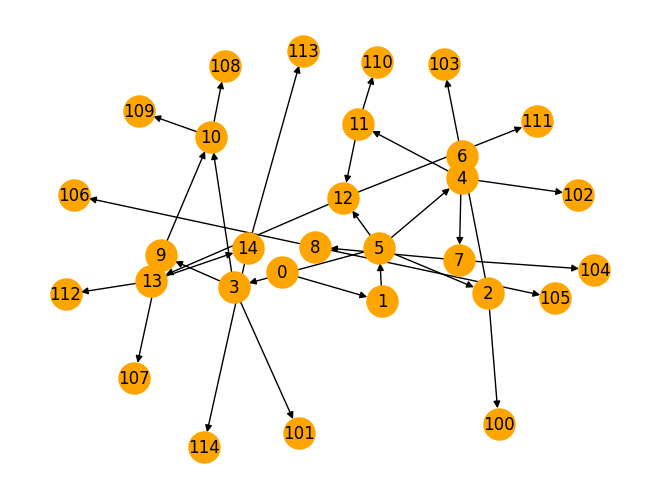

In [40]:
G = nx.DiGraph()

for q_id, question in questions.items():
    for answer, next_q_id in question["answers"].items():
        G.add_edge(q_id, next_q_id)

pos = nx.spring_layout(G, k=.4)
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=500)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [41]:
def word_declension(n, forms):
    if n % 10 == 1 and n % 100 != 11:
        return forms[0]
    elif n % 10 >= 2 and n % 10 <= 4 and (n % 100 < 10 or n % 100 >= 20):
        return forms[1]
    else:
        return forms[2]

In [42]:
def findCar(seed, answers):
     return filterCars([meh[action] for action in answers], seed = seed)

In [43]:
user_path = []

class MainWindow(QMainWindow):

    font = QFont()

    font.setPointSize(12)

    questionIndex = 0

    answers = []
    descriptions = []

    cars = generateCars(1000)
    done = False


    def __init__(self):

        super(MainWindow, self).__init__()


        self.setWindowTitle('Экспертная система')


        self.menu = self.menuBar()

        file_menu = self.menu.addMenu('Меню')


        option1 = QAction('Начать с начала', self)

        option2 = QAction('Помощь', self)
        option3 = QAction('Выход', self)


        option1.triggered.connect(self.startAgain)

        option2.triggered.connect(self.help)

        option3.triggered.connect(self.exit)


        file_menu.addAction(option1)

        file_menu.addAction(option2)

        file_menu.addAction(option3)


        self.question = QLabel()

        self.question.setFont(self.font)

        self.option_layout = QGridLayout()


        self.description = QTextEdit()

        self.description.setReadOnly(True)

        self.description.setFont(self.font)

        self.description.setAcceptRichText(True)
        self.description.textChanged.connect(self.toTheBottom)


        self.next_button = QPushButton('Следующий вопрос')

        self.next_button.clicked.connect(self.on_ok_clicked)

        self.next_button.setFont(self.font)


        button_layout = QHBoxLayout()

        button_layout.addWidget(self.next_button)


        self.table = QTableWidget()

        self.table.setColumnCount(8)


        self.layout = QVBoxLayout()

        self.layout.addWidget(self.question)

        self.layout.addLayout(self.option_layout)

        self.layout.addLayout(button_layout)

        self.layout.addWidget(self.table)

        self.layout.setStretchFactor(self.table, 1)


        main_layout = QHBoxLayout()

        main_layout.addLayout(self.layout)

        main_layout.addWidget(self.description)


        main_layout.setStretch(0, 2)

        main_layout.setStretch(1, 1)


        widget = QWidget()

        widget.setLayout(main_layout)

        self.setCentralWidget(widget)


        self.resize(800, 600)

        self.update_question(questions[self.questionIndex]["question"],
                             questions[self.questionIndex]["answers"],
                             questions[self.questionIndex]["description"])

        self.update_table(self.cars)


    def startAgain(self):

        self.questionIndex = 0

        self.answers = []
        self.descriptions = []

        self.next_button.setEnabled(True)

        self.cars = findCar(599, self.answers)

        self.update_table(self.cars)

        self.description.setText('')

        self.update_question(questions[self.questionIndex]["question"],
                             questions[self.questionIndex]["answers"],
                             questions[self.questionIndex]["description"])
        user_path = []



    def help(self):
        dialog = QDialog(self)
        dialog.setWindowTitle("Помощь")
        dialog.setWindowModality(Qt.ApplicationModal)
        layout = QHBoxLayout()
        helpText = QLabel(questions[self.questionIndex]["description"])
        helpText.setWordWrap(True)
        helpText.setFont(self.font)
        layout.addStretch()
        layout.addWidget(helpText)
        layout.addStretch()
        dialog.setLayout(layout)
        dialog.exec_()


    def exit(self):
        self.close()


    def add_options(self, options, widget_type=QRadioButton):

        self.options = [widget_type(opt) for opt in options]

        for i, opt in enumerate(self.options, 1):

            opt.setFont(self.font)

            self.option_layout.addWidget(opt, i, 1)


    def clear_options(self):

        for i in reversed(range(self.option_layout.count())):

            self.option_layout.itemAt(i).widget().setParent(None)


    def update_question(self, question, options, description):

        self.question.setText(question)

        self.question.setToolTip(description)

        self.clear_options()

        self.add_options(options)


    def on_ok_clicked(self):

        for i, opt in enumerate(self.options, 1):

            if opt.isChecked():

                user_path.append(self.questionIndex)

                self.answers.append((self.questionIndex, i - 1))

                self.cars = findCar(599, self.answers)

                self.update_table(self.cars)


                if questions[self.questionIndex]["answers"].get(opt.text()) >= 100 or len(self.cars) == 0:

                    if not self.done:
                        self.next_button.setEnabled(False)
                        self.descriptions.append(
                            f"\n<b>{opt.text()}</b><br>{questions[self.questionIndex]['answerDescription'].get(opt.text())}<br>")
                        descriptionText = "\n".join(
                            [item for item in self.descriptions])
                        descriptionText += ('<b><br><br>На основании предоставленных вами критериев поиска ' +
                                            f'{word_declension(len(self.cars), ["был", "было", "было"])} ' +
                                            f'{word_declension(len(self.cars), ["обнаружен", "обнаружено", "обнаружено"])} ' +
                                            f'{len(self.cars)} {word_declension(len(self.cars), ["соответствующий", "соответствующих", "соответствующих"])} ' +
                                            f'{word_declension(len(self.cars), ["автомобиль", "автомобиля", "автомобилей"])}.</b>' +
                                            ('<b>Список найденных автомобилей отображен в таблице слева</b>' 
                                            if len(self.cars) > 0 else 
                                            '<b>Попробуйте повторить попытку изменив некоторые из параметров.</b>'))
                        self.description.setText(descriptionText)

                    self.done = True
                    user_path.append(
                        questions[self.questionIndex]["answers"].get(opt.text()))

                    self.cars = findCar(599, self.answers)

                    self.update_table(self.cars)

                    break
                self.descriptions.append(
                    f"<b>{opt.text()}</b><br>{questions[self.questionIndex]['answerDescription'].get(opt.text())}<br>")
                self.description.setText(
                    "".join([item for item in self.descriptions]))

                self.questionIndex = questions[self.questionIndex]["answers"].get(
                    opt.text())

                self.update_question(questions[self.questionIndex]["question"],
                                     questions[self.questionIndex]["answers"],
                                     questions[self.questionIndex]["description"])

                break

        else:

            print("No option is selected")

    def toTheBottom(self):
        cursor = self.description.textCursor()
        cursor.movePosition(QTextCursor.End)
        self.description.setTextCursor(cursor)
        self.description.ensureCursorVisible()


    def update_table(self, data):

        if (len(data) > 0):
            self.table.setRowCount(len(data))

            self.table.setColumnCount(len(data[0]))

            self.table.setHorizontalHeaderLabels(data[0].keys())

            for i, row_data in enumerate(data):

                for j, (key, value) in enumerate(row_data.items()):

                    self.table.setItem(i, j, QTableWidgetItem(str(value)))
        else:
            self.table.setRowCount(0)

            self.table.setColumnCount(0)

        self.table.resizeColumnsToContents()



app = QApplication([])

window = MainWindow()

window.show()
app.exec_()
del app

0 -> 1 -> 5 -> 3 -> 10 -> 108


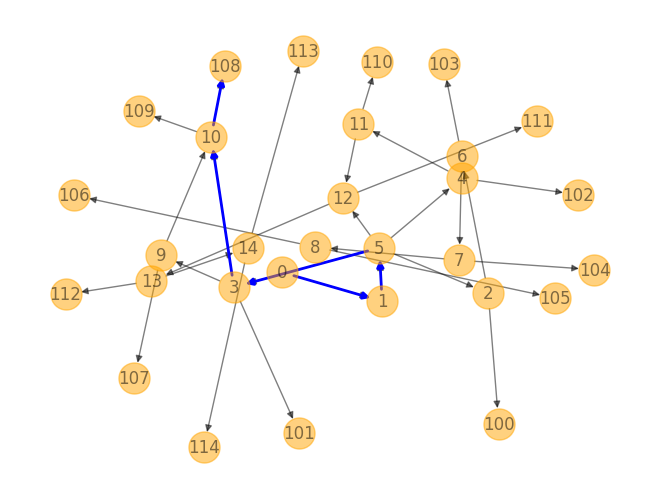

In [44]:
print(' -> '.join([str(item) for item in user_path]))

nx.draw(G, pos, with_labels=True, node_color='orange', node_size=500, alpha=.5)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, alpha=.5)

path_edges = [(user_path[n], user_path[n + 1]) for n in range(len(user_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

plt.show()

In [45]:
# def ask_question(state):
#     question = questions[state]["question"]
#     answers = questions[state]["answers"]
#     print(question)
#     listAnswers = list(answers)
#     for i, val in enumerate(listAnswers):
#         print(f"{i + 1}) {val}")
#     index = -1
#     try:
#         index = int(input()) - 1
#     except ValueError:
#         print("Wrong input")
#         return
#     user_answer = listAnswers[index]
#     print(f'Ответ: {user_answer}\n')
#     user_answers.append((state, index))
#     next_state = answers.get(user_answer)
#     user_path.append(next_state)
#     if next_state is None:
#         print("Неверный ответ, попробуйте еще раз.")
#         ask_question(state)
#     elif next_state in questions:
#         ask_question(next_state)
#     else:
#         print([meh[action] for action in user_answers])

# user_path = [0]
# user_answers = []
# ask_question(0)

In [46]:
# cars = findCar(599, user_answers)
# print('На основании предоставленных вами критериев поиска ' + 
#       f'{word_declension(len(cars), ["был", "было", "было"])} ' + 
#       f'{word_declension(len(cars), ["обнаружен", "обнаружено", "обнаружено"])} ' + 
#       f'{len(cars)} {word_declension(len(cars), ["соответствующий", "соответствующих", "соответствующих"])} ' +
#       f'{word_declension(len(cars), ["автомобиль", "автомобиля", "автомобилей"])}. ')
# for car in cars:
#     print(f"{car['Бренд и модель']} {car['Год выпуска']}    \tПробег: {car['Пробег']} Стоимость аренды: {car['Стоимость аренды']}")


In [47]:
# import networkx as nx
# import matplotlib.pyplot as plt

# nx.draw(G, pos, with_labels=True, node_color='orange', node_size=500, alpha=.5)
# labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, alpha=.5)

# path_edges = [(user_path[n], user_path[n + 1]) for n in range(len(user_path) - 1)]
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

# plt.show()